In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-paper')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

<img src="kui_frame.png" width="650">

## 1. Activness 데이터 EDA

### 1.1 File Info.
- 일별 Active 유저수 (국가별, 기준별, 플랫폼별 구분)
- 데이터 포멧이 일반적인 포멧과 다름 (대부분 카테고리 변수, 하나의 컬럼만 집계된 결과) 따라서 이용에 주의 필요

- `pd.read_table` 명령어를 통해 데이터를 읽어오고, `head()`, `info()` 함수를 통해 데이터 형상을 확인하도록 하자.

In [2]:
df = pd.read_table("kuiData.tsv", sep='\t')

In [3]:
df.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
0,1475852400,all,1,1,1,0,--,9.0
1,1475852400,all,1,1,1,0,A1,6.0
2,1475852400,all,1,1,1,0,AF,21.0
3,1475852400,all,1,1,1,0,AI,1.0
4,1475852400,all,1,1,1,0,AL,308.0


In [4]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846.0
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234.0
249292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249294,���� ����,If Android = ostype = 1 & Aswtype = 1,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# slicing based on row numbers
df = df.ix[:len(df)-4]

In [6]:
df.tail()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
249287,1476543600,view,ALL,ALL,ALL,ALL,VN,6956.0
249288,1476543600,view,ALL,ALL,ALL,ALL,WS,1.0
249289,1476543600,view,ALL,ALL,ALL,ALL,YE,193.0
249290,1476543600,view,ALL,ALL,ALL,ALL,ZA,4846.0
249291,1476543600,view,ALL,ALL,ALL,ALL,ZM,234.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249292 entries, 0 to 249291
Data columns (total 8 columns):
datetime        249292 non-null object
dataType        249292 non-null object
deviceTypeNo    249292 non-null object
osTypeNo        249292 non-null object
aswTypeNo       249292 non-null object
isPaid          249292 non-null object
countryCode     248394 non-null object
userCount       249292 non-null float64
dtypes: float64(1), object(7)
memory usage: 15.2+ MB


In [8]:
df = df[df['countryCode'] != '--']

In [9]:
df[df['countryCode'].isnull() == True].head(20)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
161,1475852400,all,1,1,1,ALL,NaN,273.0
396,1475852400,all,1,2,1,0,NaN,7.0
925,1475852400,all,1,ALL,ALL,0,NaN,280.0
1160,1475852400,all,2,3,ALL,0,NaN,1.0
1216,1475852400,all,2,3,ALL,ALL,NaN,1.0
1507,1475852400,all,2,ALL,ALL,ALL,NaN,1.0
2365,1475852400,all,6,3,6,0,NaN,6.0
2504,1475852400,all,6,3,ALL,0,NaN,6.0
2578,1475852400,all,6,3,ALL,ALL,NaN,6.0
2755,1475852400,all,6,ALL,6,0,NaN,6.0


In [10]:
df = df.dropna(subset = ['countryCode'])

In [11]:
# type convert
df['datetime'] = pd.to_datetime(df['datetime'], unit='s').dt.date # timestamp to datetime of pd
df['userCount'] = df['userCount'].astype(int)

In [12]:
df.isnull().sum()

datetime        0
dataType        0
deviceTypeNo    0
osTypeNo        0
aswTypeNo       0
isPaid          0
countryCode     0
userCount       0
dtype: int64

###  1.2 Column Info.

- datatime: 수집 날짜 (timestamp 형식)
- dataType: 데이터 유형
    - 기존에는 로그인이 active 기준
    - 개선안 후보 1) 문서 보기: **if dataType == 'view'**
    - 개선안 후보 2) 문서 보기 or 수정 or 내보내기: **if dataType == 'all'**
 
- 카테고리 변수
    - deviceTypeNo: 디바이스 유형
    - osTypeNo: OS 유형
    - aswTypeNo: 플랫폼 유형
    - isPaid: 유료 무료 여부
    - if 위 컬럼에서 values가 == 'ALL': 모든 범주변인의 합산
- Note: all and ALL means different status
- countryCode: 국가코드
- userCount: 유저수


In [13]:
df.datetime.value_counts().sort_index()

2016-10-07    27000
2016-10-08    26616
2016-10-09    27690
2016-10-10    28060
2016-10-11    28095
2016-10-12    27803
2016-10-13    28322
2016-10-14    27257
2016-10-15    26447
Name: datetime, dtype: int64

In [14]:
# all: active 판정기준 1)
# view: active 판정기준 2)
df.dataType.value_counts()

all     145117
view    102173
Name: dataType, dtype: int64

In [15]:
df.deviceTypeNo.value_counts()

ALL    109446
1       55878
6       35078
3       34172
2       12716
Name: deviceTypeNo, dtype: int64

In [16]:
df.osTypeNo.value_counts()

ALL    81693
3      48595
1      45350
2      34639
4      23743
5       6832
7       5552
0        838
6         48
Name: osTypeNo, dtype: int64

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4

In [17]:
df.aswTypeNo.value_counts()

ALL    109446
1       55878
6       35078
3       34172
2       12716
Name: aswTypeNo, dtype: int64

- aswtypeno
    - 1: App
    - 6: PC
    - 3: ?
    - 2: ?

In [18]:
df.isPaid.value_counts()

ALL    109455
0      109213
1       28622
Name: isPaid, dtype: int64

- isPaid Code
    - 0: 무료 유저
    - 1: 유료 유저

In [19]:
df.countryCode.value_counts()[:10]

ALL    2901
US     2693
KR     2660
JP     2379
GB     2317
MX     2263
ES     2259
IT     2253
BR     2221
DE     2193
Name: countryCode, dtype: int64

In [20]:
df.countryCode.value_counts().sort_values(ascending=True)[:10]

KI     48
CK     64
CF    128
YT    128
WS    128
GL    176
MF    192
FM    200
SB    224
PW    224
Name: countryCode, dtype: int64

### 1.3 dataType 분리후 EDA
- if dataType == 'all', **View or Edit or Export** 기준
- if dataType == 'view', **View** 기준
- if values = 'ALL': 모든 범주변인의 합산
- **all and ALL are different vales**

In [21]:
# df all-based active
df_all = df.query("dataType == 'all'")

# df view-based active
df_view = df.query("dataType == 'view'")

In [22]:
print(len(df_all))
print(len(df_view))

145117
102173


In [23]:
df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


In [24]:
# all base total
df_all_tot = df_all.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [25]:
df_all_tot.head(10)

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14316,2016-10-07,all,ALL,ALL,ALL,ALL,ALL,897602
41320,2016-10-08,all,ALL,ALL,ALL,ALL,ALL,792150
68748,2016-10-09,all,ALL,ALL,ALL,ALL,ALL,1014554
96845,2016-10-10,all,ALL,ALL,ALL,ALL,ALL,1118078
125108,2016-10-11,all,ALL,ALL,ALL,ALL,ALL,1125967
153329,2016-10-12,all,ALL,ALL,ALL,ALL,ALL,1137472
181640,2016-10-13,all,ALL,ALL,ALL,ALL,ALL,1172697
209694,2016-10-14,all,ALL,ALL,ALL,ALL,ALL,915171
236717,2016-10-15,all,ALL,ALL,ALL,ALL,ALL,777353


In [26]:
df_all_tot.groupby("datetime")['userCount'].sum()#.plot()

datetime
2016-10-07     897602
2016-10-08     792150
2016-10-09    1014554
2016-10-10    1118078
2016-10-11    1125967
2016-10-12    1137472
2016-10-13    1172697
2016-10-14     915171
2016-10-15     777353
Name: userCount, dtype: int64

In [27]:
# view base total
df_view_tot = df_view.query("deviceTypeNo == 'ALL' & osTypeNo == 'ALL' & aswTypeNo == 'ALL' & isPaid == 'ALL' & countryCode == 'ALL'")

In [28]:
df_view_tot.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
8971,2016-10-07,view,ALL,ALL,ALL,ALL,ALL,784724
36041,2016-10-08,view,ALL,ALL,ALL,ALL,ALL,668074
63238,2016-10-09,view,ALL,ALL,ALL,ALL,ALL,895476
91303,2016-10-10,view,ALL,ALL,ALL,ALL,ALL,1009002
119572,2016-10-11,view,ALL,ALL,ALL,ALL,ALL,1007868


In [29]:
# view 
df_view_tot.groupby("datetime")['userCount'].sum()#.plot()

datetime
2016-10-07     784724
2016-10-08     668074
2016-10-09     895476
2016-10-10    1009002
2016-10-11    1007868
2016-10-12    1012543
2016-10-13     982975
2016-10-14     788809
2016-10-15     675327
Name: userCount, dtype: int64

In [30]:
## for BASE LINE
## bring previous DAU index for comparison

# index
dates_idx = pd.date_range('20161007', periods=9)

# values
dau = pd.Series([1097686, 966350, 1264246, 1388723, 1389716, 1401294, 1367030, 1143068, 1011094], index=dates_idx)

In [31]:
dau # if the app activated, counted!

2016-10-07    1097686
2016-10-08     966350
2016-10-09    1264246
2016-10-10    1388723
2016-10-11    1389716
2016-10-12    1401294
2016-10-13    1367030
2016-10-14    1143068
2016-10-15    1011094
Freq: D, dtype: int64

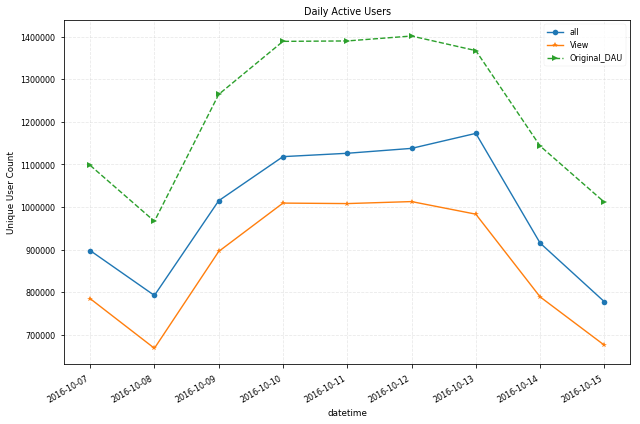

In [32]:
plt.figure(figsize=(9,6))

df_all_tot.groupby("datetime")['userCount'].sum().plot(marker='o', label='all');
df_view_tot.groupby("datetime")['userCount'].sum().plot(marker='*', label='View');
dau.plot(marker='>', linestyle='dashed', label='Original_DAU');

plt.title("Daily Active Users")
plt.ylabel("Unique User Count")
#plt.ylim(400000, 1500000)
#plt.grid(color='lightgray')
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### Note

- 원래 DAU 값과 2가지 기준의 값에 큰 GAP 존재 (GAP: 허수)
- 세 지표의 트렌드는 유사함
- datatype = all 인경우가 activeness 로서 적절할 것으로 판단
    - 기존에서 변화가 보수적
    - edit, export는 누락하는 것은 부적절

In [33]:
# df view-based active
# df_all = df.query("dataType == 'all'")

df_all.head()

,datetime,dataType,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
1,2016-10-07,all,1,1,1,0,A1,6
2,2016-10-07,all,1,1,1,0,AF,21
3,2016-10-07,all,1,1,1,0,AI,1
4,2016-10-07,all,1,1,1,0,AL,308
5,2016-10-07,all,1,1,1,0,AO,184


### 1.4 osTypeNo 기준 데이터탐색

In [34]:
df_all.drop("dataType", axis=1, inplace=True)

- osTypeNo code
    - Android = 1
    - iOS = 2
    - Windows = 3
    - Mac = 4
    - 나머지는 unknown

In [35]:
df_all.osTypeNo.value_counts()

ALL    48069
3      32176
1      23899
2      18317
4      15624
5       3480
7       2888
0        632
6         32
Name: osTypeNo, dtype: int64

In [36]:
# 탐색용 함수 생성
def df_by_type(df, devicetype, ostype, aswtype, ispaid, countrycd):

    df = df[(df['deviceTypeNo'] == devicetype) & (df['osTypeNo'] == ostype)  \
            & (df['aswTypeNo'] == aswtype) & (df['isPaid'] == ispaid) & (df['countryCode'] == countrycd)]

    return df

In [37]:
# create four dataframe based on the condition
df_aos = df_by_type(df_all, 'ALL', '1', 'ALL', 'ALL', 'ALL')

df_aos.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
12476,2016-10-07,ALL,1,ALL,ALL,ALL,770994
39484,2016-10-08,ALL,1,ALL,ALL,ALL,649334
66816,2016-10-09,ALL,1,ALL,ALL,ALL,845110
94897,2016-10-10,ALL,1,ALL,ALL,ALL,956937
123165,2016-10-11,ALL,1,ALL,ALL,ALL,957161


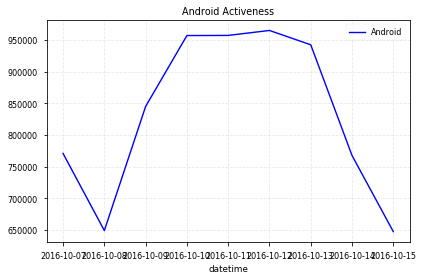

In [38]:
df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');

plt.title("Android Activeness")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

In [39]:
df_ios = df_by_type(df_all, 'ALL', '2', 'ALL', 'ALL', 'ALL')
df_win = df_by_type(df_all, 'ALL', '3', 'ALL', 'ALL', 'ALL')
df_mac = df_by_type(df_all, 'ALL', '4', 'ALL', 'ALL', 'ALL')

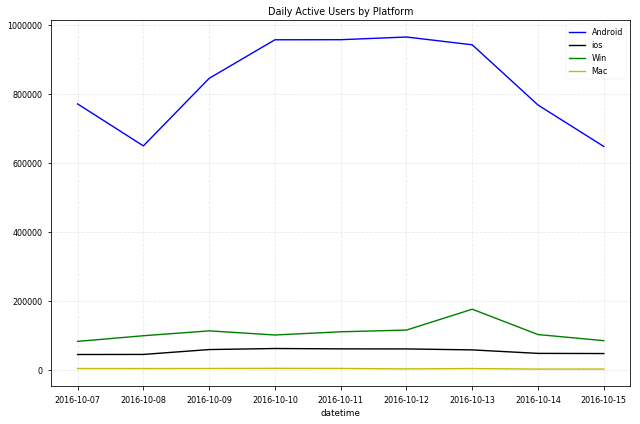

In [40]:
fig = plt.figure(figsize=(9,6))

df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', c='b');
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', c='k');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', c='g');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', c='y');

plt.title("Daily Active Users by Platform")
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

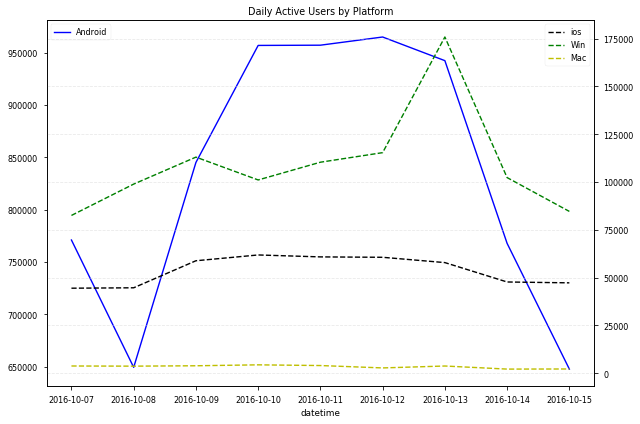

In [41]:
fig = plt.figure(figsize=(9,6))

ax = fig.add_subplot(111)
#df_view.groupby("datetime").sum()['userCount'].plot(label='View', ax=ax, marker='o', c='r')
df_aos.groupby("datetime").sum()['userCount'].plot(label='Android', ax=ax, c='b');

ax2 = ax.twinx()
df_ios.groupby("datetime").sum()['userCount'].plot(label='ios', ax=ax2, c='k', linestyle='dashed');
df_win.groupby("datetime").sum()['userCount'].plot(label='Win', ax=ax2, c='g', linestyle='dashed');
df_mac.groupby("datetime").sum()['userCount'].plot(label='Mac', ax=ax2, c='y', linestyle='dashed');

plt.title("Daily Active Users by Platform")
ax.legend(loc=2)
ax2.legend(loc=1)
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

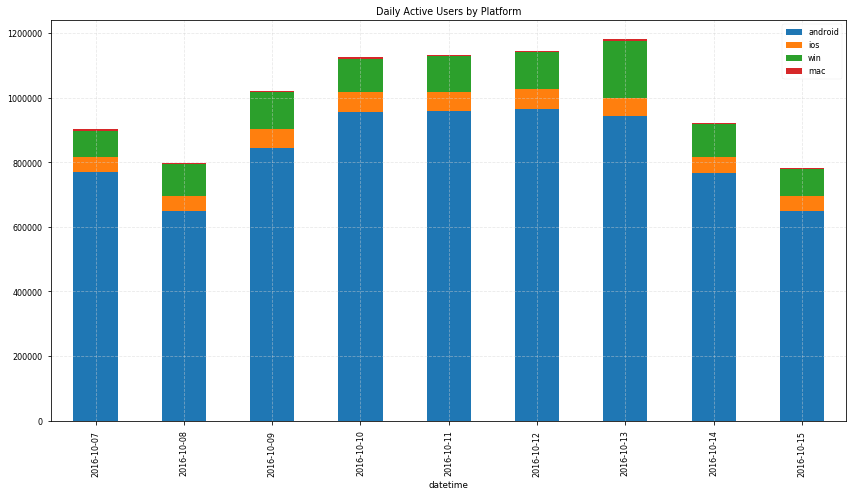

In [42]:
plt.figure(figsize=(9,6))

aos = df_aos.groupby("datetime").sum()['userCount']
ios = df_ios.groupby("datetime").sum()['userCount']
win = df_win.groupby("datetime").sum()['userCount']
mac = df_mac.groupby("datetime").sum()['userCount']

# create a df
plf = pd.concat([aos, ios, win, mac], axis=1)
plf.columns = ['android', 'ios', 'win', 'mac']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.5 결제 유무(isPaid)기준 데이터 탐색

In [43]:
df_all.isPaid.value_counts()

ALL    64176
0      64056
1      16885
Name: isPaid, dtype: int64

- isPaid code
    - 0: Free
    - 1: Paid

In [44]:
df_free = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '0', 'ALL')
df_paid = df_by_type(df_all, 'ALL', 'ALL', 'ALL', '1', 'ALL')

In [45]:
df_free.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
14209,2016-10-07,ALL,ALL,ALL,0,ALL,895125
41217,2016-10-08,ALL,ALL,ALL,0,ALL,789819
68641,2016-10-09,ALL,ALL,ALL,0,ALL,1011593
96739,2016-10-10,ALL,ALL,ALL,0,ALL,1114967
124999,2016-10-11,ALL,ALL,ALL,0,ALL,1122786


In [46]:
df_paid.head(5)

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
23301,2016-10-07,ALL,ALL,ALL,1,ALL,2477
50195,2016-10-08,ALL,ALL,ALL,1,ALL,2331
77940,2016-10-09,ALL,ALL,ALL,1,ALL,2961
106169,2016-10-10,ALL,ALL,ALL,1,ALL,3111
134404,2016-10-11,ALL,ALL,ALL,1,ALL,3181


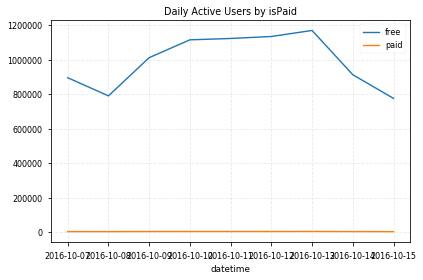

In [47]:
fig = plt.figure()

df_free.groupby("datetime")['userCount'].sum().plot(label='free');
df_paid.groupby("datetime")['userCount'].sum().plot(label='paid');

plt.title("Daily Active Users by isPaid")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

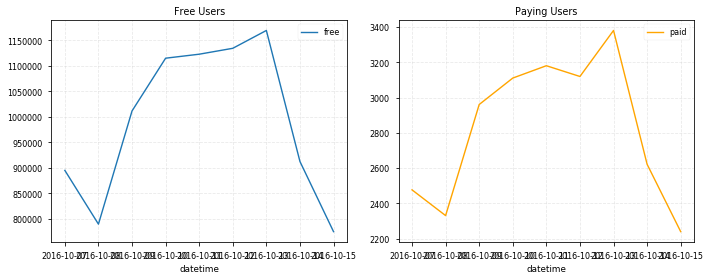

In [48]:
fig, ax = plt.subplots(1, 2)

df_free.groupby("datetime")['userCount'].sum().plot(label='free', ax=ax[0], figsize=(10,4));
ax[0].set_title("Free Users")
ax[0].legend()
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

df_paid.groupby("datetime")['userCount'].sum().plot(label='paid', ax=ax[1], color='orange');
ax[1].set_title("Paying Users")
ax[1].legend()
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

### 1.6 aswType 기준으로 데이터 탐색해보세요.

- code
    - 1: APP(mobile)
    - 3: Web
    - 6: PC
    - 2: Sync

### 1.7 크로스 탐색
- 1) ostype & paid
- 2) aswtype & paid

In [49]:
# df, devicetype, ostype, aswtype, ispaid, countrycd
# android
df_aos_free = df_by_type(df_all, 'ALL', '1', 'ALL', '0', 'ALL')
df_aos_paid = df_by_type(df_all, 'ALL', '1', 'ALL', '1', 'ALL')

#ios
df_ios_free = df_by_type(df_all, 'ALL', '2', 'ALL', '0', 'ALL')
df_ios_paid = df_by_type(df_all, 'ALL', '2', 'ALL', '1', 'ALL')

# pc
df_win_free = df_by_type(df_all, 'ALL', '3', 'ALL', '0', 'ALL')
df_win_paid = df_by_type(df_all, 'ALL', '3', 'ALL', '1', 'ALL')

In [50]:
df_win_free.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
22190,2016-10-07,ALL,3,ALL,0,ALL,81544
49076,2016-10-08,ALL,3,ALL,0,ALL,97923
76792,2016-10-09,ALL,3,ALL,0,ALL,111653
105034,2016-10-10,ALL,3,ALL,0,ALL,99763
133262,2016-10-11,ALL,3,ALL,0,ALL,109019


In [51]:
df_win_paid.head()

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
4138,2016-10-07,ALL,3,ALL,1,ALL,992
31285,2016-10-08,ALL,3,ALL,1,ALL,999
58270,2016-10-09,ALL,3,ALL,1,ALL,1372
86209,2016-10-10,ALL,3,ALL,1,ALL,1321
114489,2016-10-11,ALL,3,ALL,1,ALL,1343


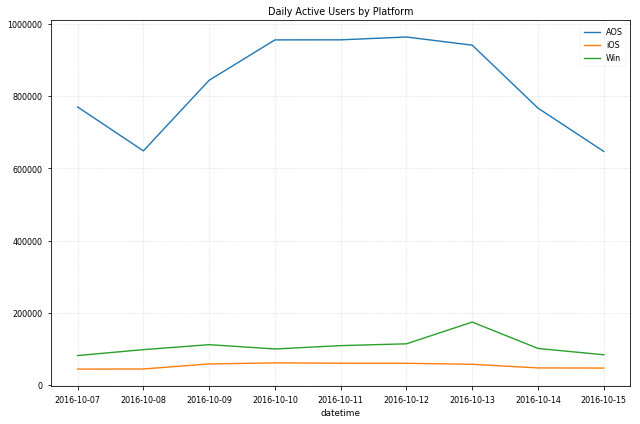

In [52]:
fig = plt.figure(figsize=(9,6))

df_aos_free.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_free.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_free.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

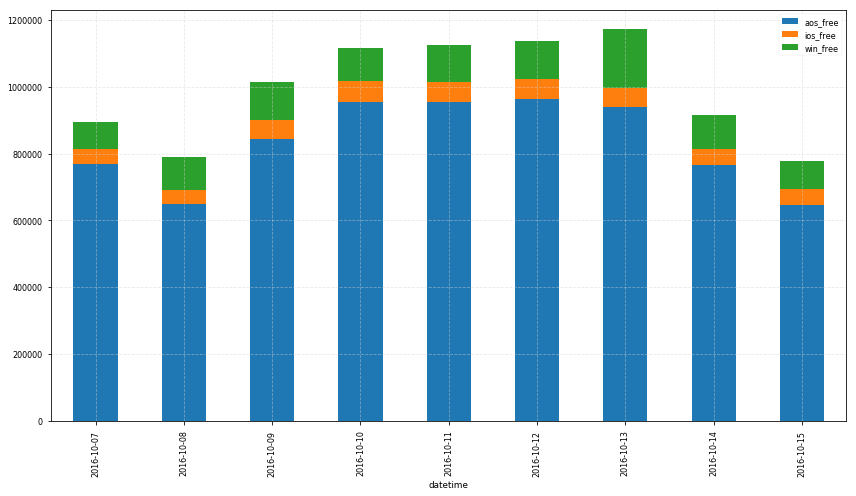

In [53]:
plt.figure(figsize=(9,6))

aos_free = df_aos_free.groupby("datetime")['userCount'].sum()
ios_free = df_ios_free.groupby("datetime")['userCount'].sum()
win_free = df_win_free.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_free, ios_free, win_free], axis=1)
plf.columns = ['aos_free', 'ios_free', 'win_free']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

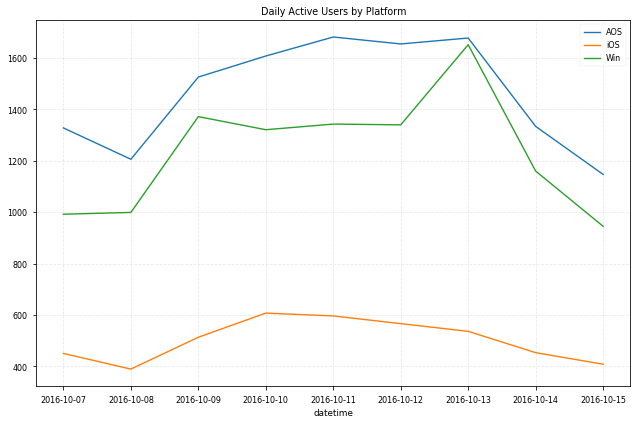

In [54]:
fig = plt.figure(figsize=(9,6))

df_aos_paid.groupby("datetime")['userCount'].sum().plot(label='AOS');
df_ios_paid.groupby("datetime")['userCount'].sum().plot(label='iOS');
df_win_paid.groupby("datetime")['userCount'].sum().plot(label='Win');

plt.title("Daily Active Users by Platform")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

<Figure size 648x432 with 0 Axes>

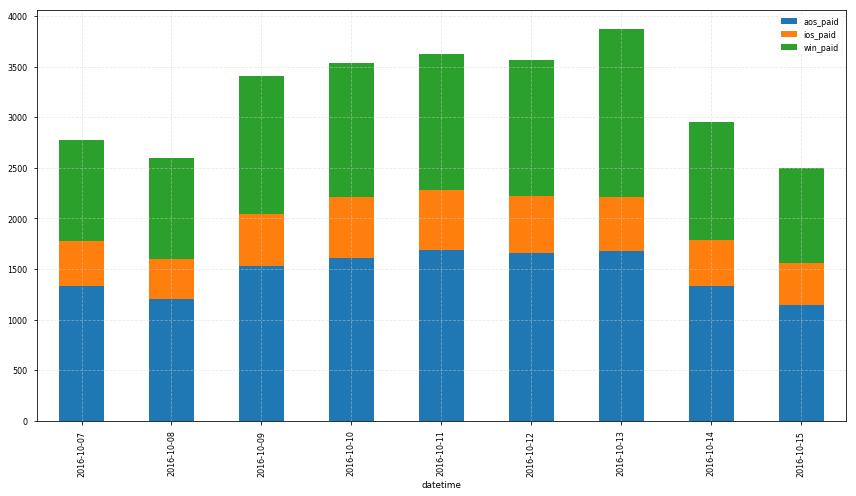

In [55]:
plt.figure(figsize=(9,6))

aos_paid = df_aos_paid.groupby("datetime")['userCount'].sum()
ios_paid = df_ios_paid.groupby("datetime")['userCount'].sum()
win_paid = df_win_paid.groupby("datetime")['userCount'].sum()

# create a df
plf = pd.concat([aos_paid, ios_paid, win_paid], axis=1)
plf.columns = ['aos_paid', 'ios_paid', 'win_paid']

# plot
plf.plot(kind='bar', stacked=True, figsize=(12,7));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### 1.8 크로스 탐색을 해주세요.

- 2) aswtype & paid

### 1.9 국가별 Activeness 탐색

In [56]:
# 상위 Top country
df_all.countryCode.value_counts()

ALL    1609
KR     1513
US     1509
JP     1348
GB     1329
IT     1283
MX     1278
ES     1276
BR     1268
AU     1257
       ... 
AS      112
PW      112
FM      106
MF       96
GL       88
WS       64
YT       64
CF       64
CK       32
KI       32
Name: countryCode, Length: 229, dtype: int64

In [57]:
df_kr = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'KR')

In [58]:
df_kr

,datetime,deviceTypeNo,osTypeNo,aswTypeNo,isPaid,countryCode,userCount
23368,2016-10-07,ALL,ALL,ALL,ALL,KR,170188
50258,2016-10-08,ALL,ALL,ALL,ALL,KR,188255
78007,2016-10-09,ALL,ALL,ALL,ALL,KR,254370
106236,2016-10-10,ALL,ALL,ALL,ALL,KR,239862
134471,2016-10-11,ALL,ALL,ALL,ALL,KR,249595
162640,2016-10-12,ALL,ALL,ALL,ALL,KR,250150
191124,2016-10-13,ALL,ALL,ALL,ALL,KR,287115
218820,2016-10-14,ALL,ALL,ALL,ALL,KR,183988
245568,2016-10-15,ALL,ALL,ALL,ALL,KR,183004


In [59]:
df_us = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'US')
df_jp = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'JP')
df_gb = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'GB')
df_it = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'IT')
df_mx = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'MX')
df_es = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'ES')
df_br = df_by_type(df_all, 'ALL', 'ALL', 'ALL', 'ALL', 'BR')

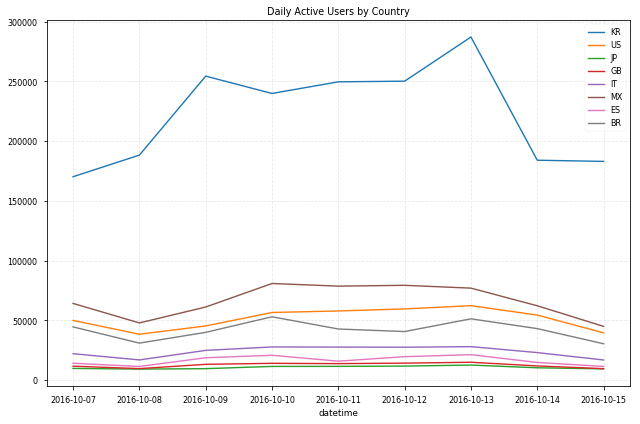

In [60]:
fig = plt.figure(figsize=(9,6))

df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

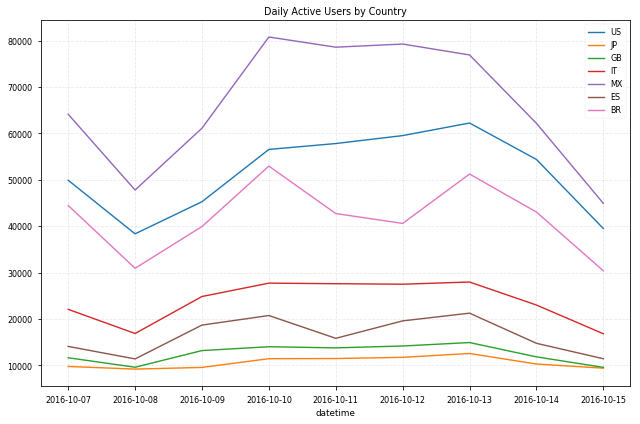

In [61]:
fig = plt.figure(figsize=(9,6))

#df_kr.groupby("datetime")['userCount'].sum().plot(label='KR');
df_us.groupby("datetime")['userCount'].sum().plot(label='US');
df_jp.groupby("datetime")['userCount'].sum().plot(label='JP');
df_gb.groupby("datetime")['userCount'].sum().plot(label='GB');
df_it.groupby("datetime")['userCount'].sum().plot(label='IT');
df_mx.groupby("datetime")['userCount'].sum().plot(label='MX');
df_es.groupby("datetime")['userCount'].sum().plot(label='ES');
df_br.groupby("datetime")['userCount'].sum().plot(label='BR');

plt.title("Daily Active Users by Country")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()

### Q) 유료 유저의 비중이 가장 많은 나라 TOP5는 어디일까요?

### 1.10 EDA Summary
- 기존 DAU에 허수값 존재. 따라서 기준 all(View+Edit+Export)로 활동성 지표를 변경!
- 활동성은 안드로이드가 절대적으로 높음 (Win > iOS > Mac)
    - 특히 android 무료 이용자 비율이  매우 높음
    - 유료 이용자의 경우 윈도우(PC) 사용 경향이 높은 편
- 국가별 분석결과, 무료 및 유료 이용자 모두 한국이 많음 (유료의 경우 미국이 특히 높음)

## 2. 지표 개발을 위한 변수 탐색 (Activation 을 측정하는 Single Index 개발)
- 목적
    - all 기준으로 일별 트래킹을 하는 방식을 기본으로 세팅 
    - 추가로, 보다 정교한 지표 수식 개발을 위해 Feature selection 진행
        - 중요도가 높은 feature를 조합(가중치부여)하여 index 개발
     - Feature Selection을 위해 데이터셋 가공
         - 이전 주차 행동 및 다음 주차 **Retention** 여부!
         - 일별 all 기준 DAU는 코호트 방식이 고려되지 않음
         - source: [link](https://medium.com/analytics-for-humans/a-beginners-guide-to-cohort-analysis-the-most-actionable-and-underrated-report-on-google-c0797d826bf4)
         
![img](cohort.png)         
 
```python
import pandas as pd
import numpy as np

# base table for each week
min_dvc = ret2.groupby("dvc_id")['Week'].min().reset_index()

# elements for loop
weeks = np.sort(ret2['Week'].unique())
len_weeks = [i+1 for i in range(len(weeks))]

# empty dataframe
ret_df = pd.DataFrame()

for w in weeks:
    ret_df = ret_df.append(pd.DataFrame(columns=[[str(i) for i in range(len(weeks))]], index=[w]))    

for w in weeks:
    # base week dvc count
    min_dvc_wk = min_dvc[min_dvc['Week'] == w]
    ret_df.ix[w,0] = len(min_dvc_wk)
    
    # next week active count
    for i in len_weeks:
        if i != len(len_weeks):
            next_dvc = min_dvc_wk.merge(ret2[ret2['Week'] == w+i], on="dvc_id", how="inner")
            ret_df.ix[w,i] = len(next_dvc)

```

### 2.1 특정 1주간 이용행동 데이터 탐색

- 탐색 데이터셋 종류
     - 1) 특정 주의 사용행동
     - 2) 그 다음주의 사용행동 & 방문 여부
- 탐색 목적
    - 첫주 -> 다음주(리텐션)에 변수별 미치는 영향력 판단
     
- 1) 유저id 별 특정 1주간 행동별 카운트
    - filecount: 이용한 파일수
    - opencount: 열람한 파일수
    - savecount: 저장한 파일수
    - exportcount: 내보내기 파일수
    - traffic: 사용량 트래픽(byte)
    - visitcount: 1주간 방문일수(최소 1일, 최대 7일)     

In [62]:
tf = pd.read_csv("lc3.csv", index_col=0)

In [63]:
tf.head()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
0,10100000000584,13,31,2,0,28264552,21504,0,6
1,10100000001960,1,1,0,0,3863040,0,0,1
2,10100000011472,10,18,5,0,7401073,103685,0,5
3,10100000014080,1,1,0,0,1140036,0,0,1
4,10100000018848,6,21,0,0,9037651,0,0,4


In [64]:
tf.tail()

,iduser,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
2907614,10100046821969,1,1,0,0,16384,0,0,1
2907615,10100046822433,1,3,0,0,42597,0,0,1
2907616,10100046822649,2,11,0,0,1051719,0,0,1
2907617,10100046823345,1,1,0,0,1120691,0,0,1
2907618,10100046824385,1,1,0,0,6258176,0,0,1


In [65]:
tf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907619 entries, 0 to 2907618
Data columns (total 9 columns):
iduser           int64
filecount        int64
opencount        int64
savecount        int64
exportcount      int64
viewtraffic      int64
edittraffic      int64
exporttraffic    int64
visitcount       int64
dtypes: int64(9)
memory usage: 221.8 MB


### 2.2 데이터 전처리
- 인덱스 설정
- 트래픽 단위 변환
- 아웃라이어 제거
- 파생변수 생성
- 테이블 조인

In [66]:
tf.iduser.is_unique # duplications check

True

In [67]:
tf.set_index("iduser", inplace=True)

In [68]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,28264552,21504,0,6
10100000001960,1,1,0,0,3863040,0,0,1
10100000011472,10,18,5,0,7401073,103685,0,5
10100000014080,1,1,0,0,1140036,0,0,1
10100000018848,6,21,0,0,9037651,0,0,4


In [69]:
# byte -> mb
tf.viewtraffic = (tf.viewtraffic/1024/1024).round(0).astype(int)
tf.edittraffic = (tf.edittraffic/1024/1024).round(0).astype(int)
tf.exporttraffic = (tf.exporttraffic/1024/1024).round(0).astype(int)

In [70]:
tf.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2,0,27,0,0,6
10100000001960,1,1,0,0,4,0,0,1
10100000011472,10,18,5,0,7,0,0,5
10100000014080,1,1,0,0,1,0,0,1
10100000018848,6,21,0,0,9,0,0,4


In [71]:
tf.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2907619.00,2907619.00,2907619.00,2907619.0,2907619.00,2907619.00,2907619.00,2907619.00
mean,2.42,6.09,0.55,0.0,5.65,0.18,0.00,1.85
std,11.79,385.97,18.67,0.2,358.02,5.59,0.17,1.22
min,1.00,1.00,0.00,0.0,-2.00,0.00,0.00,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.00,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.00,1.00
75%,3.00,7.00,0.00,0.0,4.00,0.00,0.00,2.00
max,19808.00,657925.00,30812.00,94.0,609383.00,8469.00,105.00,7.00


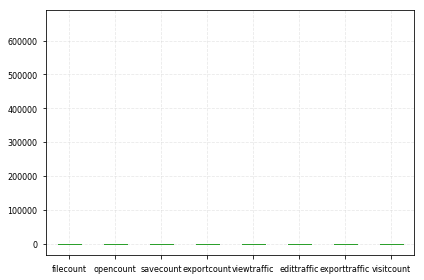

In [72]:
tf.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

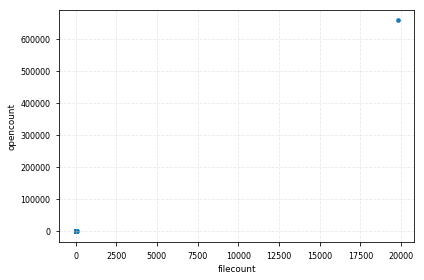

In [73]:
tf.plot(kind='scatter', x='filecount', y='opencount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

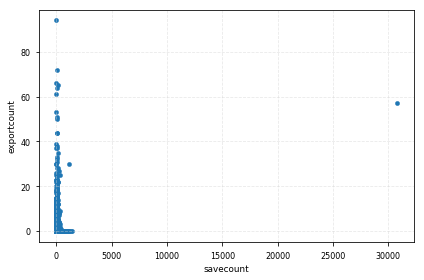

In [74]:
tf.plot(kind='scatter', x='savecount', y='exportcount');

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

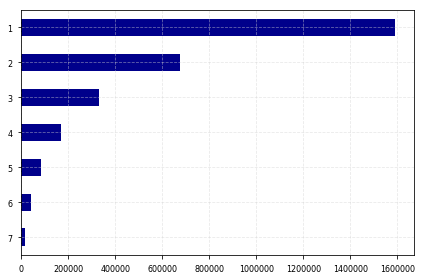

In [75]:
# 방문일수 분포 확인
tf['visitcount'].value_counts().sort_values().plot(kind='barh', color='darkblue')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

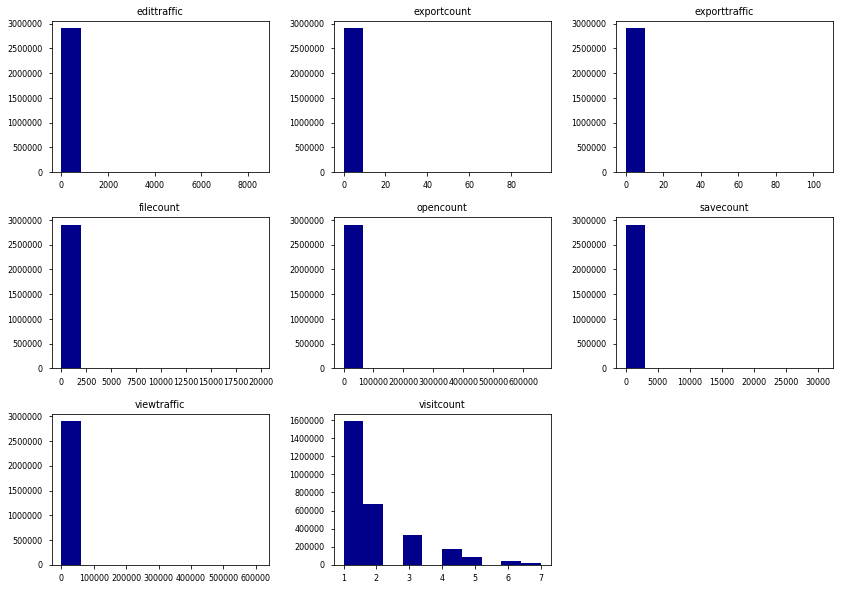

In [80]:
tf.hist(color='darkblue', figsize=(14,10), grid=False); 

In [76]:
def remove_outlier_std(df):
    for i in range(0, len(df.iloc[1])-1):
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df

In [78]:
tf_outlier_removed = remove_outlier_std(tf)

In [79]:
# max is 0?
# or export drop?
tf_outlier_removed.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2781951.00,2781951.00,2781951.00,2781951.0,2781951.00,2781951.00,2781951.0,2781951.00
mean,2.27,4.78,0.23,0.0,3.44,0.03,0.0,1.78
std,1.75,5.33,0.87,0.0,7.03,0.21,0.0,1.13
min,1.00,1.00,0.00,0.0,-1.00,0.00,0.0,1.00
25%,1.00,1.00,0.00,0.0,0.00,0.00,0.0,1.00
50%,2.00,3.00,0.00,0.0,1.00,0.00,0.0,1.00
75%,3.00,6.00,0.00,0.0,3.00,0.00,0.0,2.00
max,22.00,36.00,9.00,0.0,53.00,3.00,0.0,7.00


In [81]:
# ignore if there is Zero 
def remove_outlier_std_nozero(df):
    for i in range(0, len(df.iloc[1])-1):
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN)
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return df.fillna(0)

In [82]:
tf_outlier_removed1 = remove_outlier_std_nozero(tf)

In [83]:
tf_outlier_removed1.describe().apply(lambda x: x.round(2))

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
count,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00
mean,2.30,4.95,0.34,0.00,3.84,0.10,0.00,1.80
std,1.79,5.56,1.57,0.08,8.35,0.89,0.07,1.15
min,1.00,1.00,0.00,0.00,-2.00,0.00,0.00,1.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,2.00,3.00,0.00,0.00,1.00,0.00,0.00,1.00
75%,3.00,6.00,0.00,0.00,3.00,0.00,0.00,2.00
max,22.00,36.00,28.00,10.00,72.00,22.00,23.00,7.00


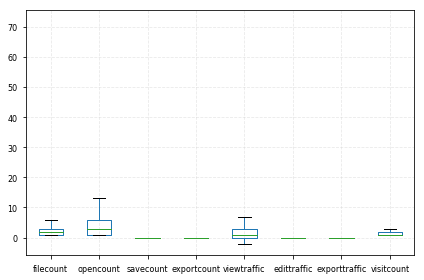

In [84]:
tf_outlier_removed1.plot(kind='box')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [85]:
tf_outlier_removed1.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0,6
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0,1
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0,5
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0,1
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0,4


In [111]:
tf2 = tf_outlier_removed1.copy()

In [103]:
tf2.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0,6
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0,1
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0,5
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0,1
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0,4


In [112]:
# 추가 변수 생성
tf2['file_per_visit'] = (tf2['filecount'] / tf2['visitcount']).round(1)
tf2['count_per_visit'] = ((tf2['opencount'] + tf2['savecount'] + tf2['exportcount']) / tf2['visitcount']).round(1)
tf2['traffic_per_visit'] = ((tf2['viewtraffic'] + tf2['edittraffic'] + tf2['exporttraffic']) / tf2['visitcount']).round(1)

In [105]:
tf2.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
iduser,,,,,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0,6,2.2,5.5,4.5
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0,1,1.0,1.0,4.0
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0,5,2.0,4.6,1.4
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0,1,1.0,1.0,1.0
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0,4,1.5,5.2,2.2


In [106]:
tf2.describe().round(2)

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
count,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00,2839612.00
mean,2.30,4.95,0.34,0.00,3.84,0.10,0.00,1.80,1.26,2.79,2.22
std,1.79,5.56,1.57,0.08,8.35,0.89,0.07,1.15,0.49,2.77,5.15
min,1.00,1.00,0.00,0.00,-2.00,0.00,0.00,1.00,1.00,1.00,0.00
25%,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
50%,2.00,3.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,2.00,0.50
75%,3.00,6.00,0.00,0.00,3.00,0.00,0.00,2.00,1.40,3.20,2.00
max,22.00,36.00,28.00,10.00,72.00,22.00,23.00,7.00,15.00,61.00,92.00


In [113]:
tf2.query("viewtraffic < 0")

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit
iduser,,,,,,,,,,,
10100038687543,1,1,2.0,0.0,-1.0,2.0,0.0,1,1.0,3.0,1.0
10100046768551,1,1,2.0,0.0,-2.0,5.0,0.0,1,1.0,3.0,3.0


In [118]:
tf2.ix[10100038687543,'viewtraffic'] = np.nan
tf2.ix[10100046768551,'viewtraffic'] = np.nan

In [124]:
tf2 = tf2.fillna(tf2.mean())

In [126]:
tf2.ix[10100038687543]

filecount            1.000000
opencount            1.000000
savecount            2.000000
exportcount          0.000000
viewtraffic          3.840277
edittraffic          2.000000
exporttraffic        0.000000
visitcount           1.000000
file_per_visit       1.000000
count_per_visit      3.000000
traffic_per_visit    1.000000
Name: 10100038687543, dtype: float64

In [127]:
tf2.ix[10100046768551]

filecount            1.000000
opencount            1.000000
savecount            2.000000
exportcount          0.000000
viewtraffic          3.840277
edittraffic          5.000000
exporttraffic        0.000000
visitcount           1.000000
file_per_visit       1.000000
count_per_visit      3.000000
traffic_per_visit    3.000000
Name: 10100046768551, dtype: float64

#### 두번째 데이터셋: 첫번째의 다음 주의 사용행동 데이터 => target variable(0, 1)

In [157]:
# 2ND week dataset
tf_2nd_wk = pd.read_csv("lc_2w.csv", index_col=0).set_index("iduser")

In [158]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount
iduser,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4
10100000059936,9,37,0,0,10818217,0,0,6
10100000314888,2,4,0,0,1707312,0,0,1
10100000348368,3,3,2,0,80678,8930,0,3
10100000538736,2,3,1,0,203776,101888,0,2


In [159]:
# retention 여부만 관심
tf_2nd_wk['flag'] = True

In [160]:
tf_2nd_wk.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,flag
iduser,,,,,,,,,
10100000000584,5,11,0,0,12821280,0,0,4,True
10100000059936,9,37,0,0,10818217,0,0,6,True
10100000314888,2,4,0,0,1707312,0,0,1,True
10100000348368,3,3,2,0,80678,8930,0,3,True
10100000538736,2,3,1,0,203776,101888,0,2,True


In [161]:
tf_2nd_wk['flag'].to_frame().head(10)

,flag
iduser,
10100000000584,True
10100000059936,True
10100000314888,True
10100000348368,True
10100000538736,True
10100001220336,True
10100001384088,True
10100003220648,True
10100003865288,True


In [162]:
print "Second week users: ", len(tf_2nd_wk['flag'])
print "First week users: ", len(tf2.index)

Second week users:  2931582
First week users:  2839612


In [163]:
# 첫째, 둘째주차 데이터 조인
tf3 = pd.merge(tf2, tf_2nd_wk['flag'].to_frame(), left_index=True, right_index=True, how='left').fillna(False)

In [164]:
tf3.head()

,filecount,opencount,savecount,exportcount,viewtraffic,edittraffic,exporttraffic,visitcount,file_per_visit,count_per_visit,traffic_per_visit,flag
iduser,,,,,,,,,,,,
10100000000584,13,31,2.0,0.0,27.0,0.0,0.0,6,2.2,5.5,4.5,True
10100000001960,1,1,0.0,0.0,4.0,0.0,0.0,1,1.0,1.0,4.0,False
10100000011472,10,18,5.0,0.0,7.0,0.0,0.0,5,2.0,4.6,1.4,True
10100000014080,1,1,0.0,0.0,1.0,0.0,0.0,1,1.0,1.0,1.0,False
10100000018848,6,21,0.0,0.0,9.0,0.0,0.0,4,1.5,5.2,2.2,True


In [165]:
tf3.flag.value_counts()

True     1574411
False    1265201
Name: flag, dtype: int64

In [170]:
# retention rate
tf3.flag.value_counts().transform(lambda x: x / x.sum())

1    0.554446
0    0.445554
Name: flag, dtype: float64

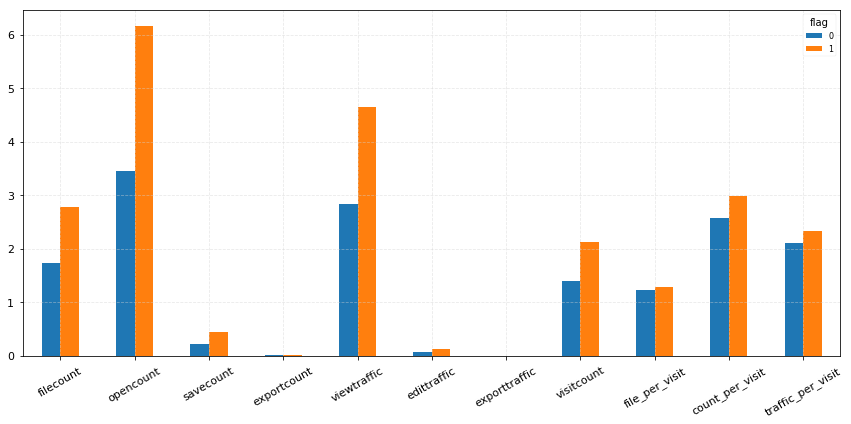

In [294]:
tf3.groupby("flag").mean().T.plot(kind='bar', figsize=(12,6), fontsize=11, rot=30);

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

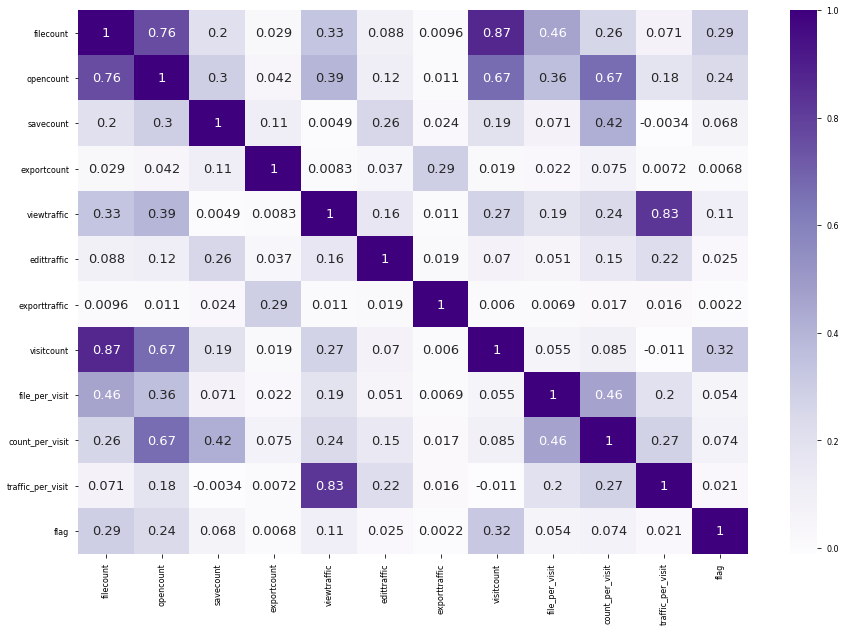

In [295]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(tf3.corr(), annot=True, annot_kws={"size": 13}, cmap='Purples');

### 2.3 변수별 영향력 도출

- 데이터 표준화 (scaling)
- 모델 학습 및 예측
- 로지스틱 회귀를 이용한 coefficient 도출
- 랜덤포레스트를 이용한 영향력 도출
- 반복적 변수 제거 방식을 이용한 변수별 중요도 도출

In [168]:
tf3['flag'] = np.where(tf3.flag == True, 1, 0)

In [169]:
tf3.flag.value_counts()

1    1574411
0    1265201
Name: flag, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split

X = tf3.drop("flag", axis=1)
y = tf3.flag

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [172]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2129709, 11)
(2129709,)
(709903, 11)
(709903,)


In [193]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def pipeline_logit(X_train, y_train):

    scaler = MinMaxScaler()
    select = SelectKBest(score_func=f_classif)
    logit_model = LogisticRegression()

    pipe = Pipeline([('scaler', scaler), ('feature_selection', select), ('model', logit_model)])

    param_grid = [{'feature_selection__k': [5, 'all'],
                   'model__C': [0.01, 0.1, 1],
                   'model__penalty': ['l1', 'l2']}]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [194]:
grid_search = pipeline_logit(X_train, y_train)

In [195]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

def evaluation(grid, X_test, y_test):
    
    print(classification_report(grid.predict(X_test), y_test))
    print("")
    print("best score: ", grid.best_score_)
    print("best params: ", grid.best_params_)

    fpr, tpr, thresholds = roc_curve(y_test, grid.predict(X_test))
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [196]:
evaluation(grid_search, X_test, y_test)

             precision    recall  f1-score   support

          0       0.70      0.58      0.63    384389
          1       0.59      0.71      0.64    325514

avg / total       0.65      0.64      0.64    709903


('best score: ', 0.6388309388747476)
('best params: ', {'model__C': 1, 'feature_selection__k': 'all', 'model__penalty': 'l2'})


0.6440689666977045

Text(0.5,0,'False Positive Rate')

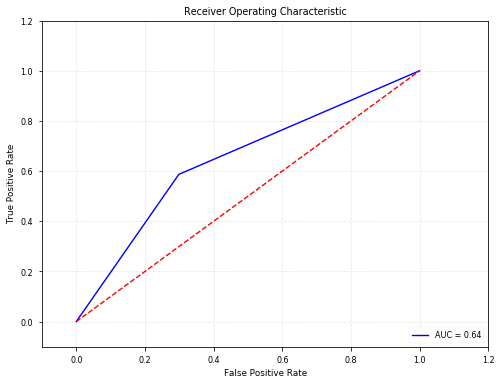

In [197]:
# ROC plot
fig = plt.figure(figsize=(8,6))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)


plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [253]:
mask = grid_search.best_estimator_.named_steps['feature_selection'].get_support()

feature_importance = grid_search.best_estimator_.named_steps['model'].coef_.ravel().tolist()
features_list = list(X_train.columns.values)

zip(features_list, feature_importance)

[('filecount', 2.0310171723847352),
 ('opencount', -0.05800989875669201),
 ('savecount', -0.3231139859703838),
 ('exportcount', -0.5921949208411401),
 ('viewtraffic', -0.07666001266154361),
 ('edittraffic', -0.30342371095666204),
 ('exporttraffic', -0.10420947757374832),
 ('visitcount', 3.6675659462408086),
 ('file_per_visit', -0.6991907073861348),
 ('count_per_visit', 1.9409765233559702),
 ('traffic_per_visit', 0.5468922888347904)]

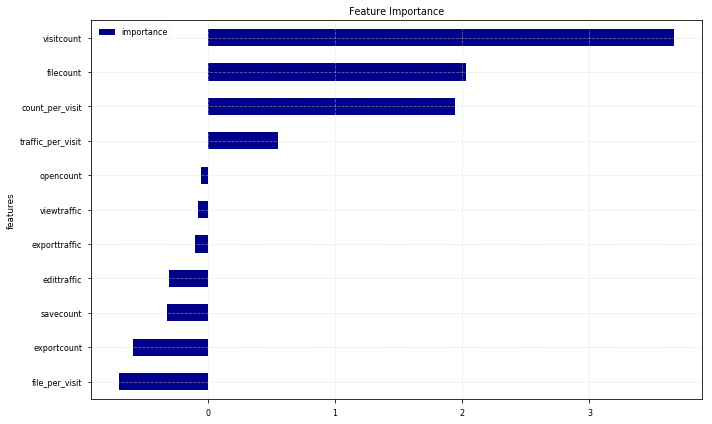

In [259]:
# create a df        
feature_importance_pd = pd.DataFrame(list(zip(features_list, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

# visiual
feature_importance_pd.plot(kind='barh', color='darkblue', figsize=(10,6));

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [272]:
from sklearn.ensemble import ExtraTreesClassifier

def pipeline_tree_kbest(X_train, y_train):

    select = SelectKBest()
    extra_tree_model = ExtraTreesClassifier()

    pipe = Pipeline([('feature_selection', select), ('model', extra_tree_model)])

    param_grid = [{'feature_selection__k': ['all'],
                   'model__max_depth': [4,6], # max_depth: The maximum depth of the tree.
                   'model__n_estimators': [10], # n_estimators: The number of trees in the forest.
                   'model__min_samples_split': [50, 100]}]

    grid_search = GridSearchCV(pipe, param_grid, cv=2)
    grid_search.fit(X_train, y_train)
    
    return grid_search

In [261]:
grid_search_tree = pipeline_tree_kbest(X_train, y_train)

In [262]:
evaluation(grid_search_tree, X_test, y_test)

             precision    recall  f1-score   support

          0       0.68      0.58      0.63    373436
          1       0.60      0.70      0.65    336467

avg / total       0.64      0.64      0.64    709903


('best score: ', 0.6386957091320927)
('best params: ', {'feature_selection__k': 5, 'model__max_depth': 6, 'model__min_samples_split': 100, 'model__n_estimators': 10})


0.6418360308610195

Text(0.5,0,'False Positive Rate')

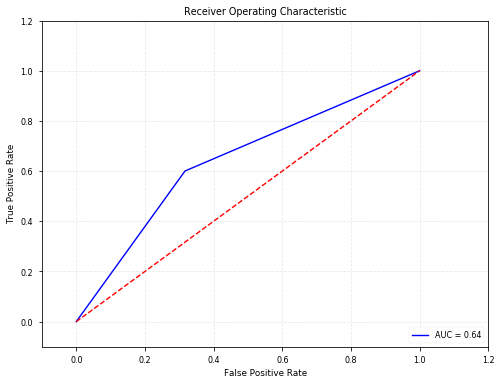

In [263]:
# ROC plot
fig = plt.figure(figsize=(8,6))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search_tree.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

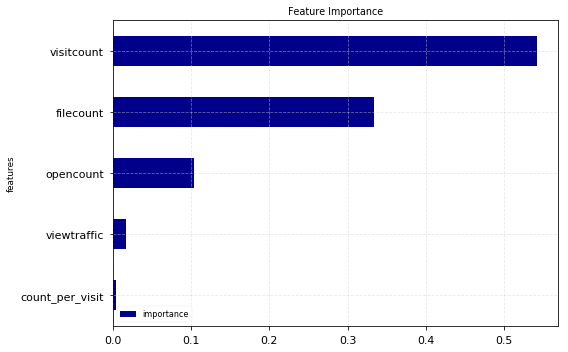

In [270]:
mask = grid_search_tree.best_estimator_.named_steps['feature_selection'].get_support()
feature_importance = grid_search_tree.best_estimator_.named_steps['model'].feature_importances_

features_list = list(X_train.columns.values)

selected_features = []
for bool, features in zip(mask, features_list):
    if bool:
        selected_features.append(features)

# create a df        
feature_importance_pd = pd.DataFrame(list(zip(selected_features, feature_importance)),\
                                    columns=['features', 'importance'])\
                          .set_index("features").sort_values("importance")

# visiual
feature_importance_pd.plot(kind='barh', color='darkblue', figsize=(8,5), fontsize=11);

plt.title("Feature Importance")
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

#### 참고:  RFE
- http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [275]:
# sapling code
tf3_sam = tf3.sample(frac=0.01, replace=False) 

X = tf3_sam.drop("flag", axis=1)
y = tf3_sam.flag

In [274]:
print(X.shape)
print(y.shape)

(28396, 11)
(28396,)


In [281]:
## RFE (Recursive Feature Elimination)
from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE

svm = LinearSVC()
rfe = RFE(svm, 5)
rfe = rfe.fit(X, y)

print(X.columns.tolist())
print(rfe.support_)
print(rfe.ranking_)

['filecount', 'opencount', 'savecount', 'exportcount', 'viewtraffic', 'edittraffic', 'exporttraffic', 'visitcount', 'file_per_visit', 'count_per_visit', 'traffic_per_visit']
[ True False False  True False False False  True  True  True False]
[1 7 4 1 3 5 6 1 1 1 2]


### Note
- Key variable => visitcount

![img](key_var.png)

### 2.4 그룹별 리텐션 여부 데이터셋
- 주요 변수 1개만 선정: **visitcount** (range: 1~7)
- group: 유저의 visitcount 기준으로 그룹 부여
    - 만약 특정주에 1일 들어왔으면, group = 1
- isnextvisit: 다음주의 재방문 여부
    - 0: 방문 안함
    - 1: 방문함
- day: group 산정일 기준
    - day 의 날짜 이전 일주일간의 데이터로 group 산정

In [305]:
sf = pd.read_csv("df_lc.csv", index_col=0)

In [306]:
sf.head(10)

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15
5,2,1,2016-10-15
6,2,0,2016-10-15
7,1,0,2016-10-15
8,2,0,2016-10-15
9,1,1,2016-10-15


In [307]:
sf.tail()

,group,isnextvisit,day
9420542,1,0,2016-10-19
9420543,1,1,2016-10-19
9420544,2,1,2016-10-19
9420545,3,0,2016-10-19
9420546,1,0,2016-10-19


In [308]:
len(sf)

9420547

In [309]:
sf['day'] = pd.to_datetime(sf['day'])

In [310]:
sf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9420547 entries, 0 to 9420546
Data columns (total 3 columns):
group          int64
isnextvisit    int64
day            datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 287.5 MB


In [311]:
sf.day.value_counts().sort_index()

2016-09-27    296079
2016-09-28    299358
2016-09-29    301737
2016-09-30    304003
2016-10-01    302862
2016-10-02    302628
2016-10-03    302787
2016-10-04    302598
2016-10-05    302986
2016-10-06    301461
               ...  
2016-10-17    323232
2016-10-18    326945
2016-10-19    330996
2016-10-20    334786
2016-10-21    338143
2016-10-22    340399
2016-10-23    338552
2016-10-24    337666
2016-10-25    336850
2016-10-26    337398
Name: day, Length: 30, dtype: int64

In [315]:
# 그룹별 리텐션 비율
sf_ret = sf.groupby(['group', 'isnextvisit']).size().unstack()
sf_ret.columns = ['churn', 'retention']

sf_ret

,churn,retention
group,,
1,3465785,2118215
2,705404,1255567
3,209120,742073
4,63628,429373
5,18131,239102
6,4593,118940
7,876,49740


In [319]:
sf_ret1 = sf_ret.apply(lambda x: x/x.sum() * 100, axis=1).round(2).reset_index()

sf_ret1

,group,churn,retention
0,1,62.07,37.93
1,2,35.97,64.03
2,3,21.99,78.01
3,4,12.91,87.09
4,5,7.05,92.95
5,6,3.72,96.28
6,7,1.73,98.27


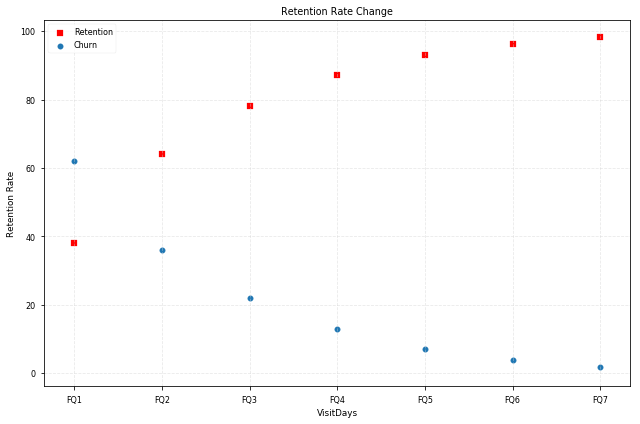

In [320]:
fig, ax = plt.subplots(figsize=(9,6))

plt.scatter(sf_ret1.group, sf_ret1.retention, color='r', label="Retention", marker=',')
plt.scatter(sf_ret1.group, sf_ret1.churn, label="Churn")

plt.title("Retention Rate Change")
plt.ylabel("Retention Rate")
plt.xlabel("VisitDays")
plt.xticks([1,2,3,4,5,6,7], ['FQ1', 'FQ2', 'FQ3', 'FQ4', 'FQ5', 'FQ6', 'FQ7'])
plt.legend()
plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

## 3. 스코어 산출 및 대시보드 구축

- Logistic regression에서 베타값 활용 ✓
    - reference: http://blog.yhat.com/posts/logistic-regression-and-python.html
    - another option: Random Forest's Feature Importance
<img src="kui_frame.png" width="650">    

### 3.1 변수별 영향력 산출

In [321]:
sf.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [325]:
sf.day.value_counts().sort_index()

2016-09-27    296079
2016-09-28    299358
2016-09-29    301737
2016-09-30    304003
2016-10-01    302862
2016-10-02    302628
2016-10-03    302787
2016-10-04    302598
2016-10-05    302986
2016-10-06    301461
               ...  
2016-10-17    323232
2016-10-18    326945
2016-10-19    330996
2016-10-20    334786
2016-10-21    338143
2016-10-22    340399
2016-10-23    338552
2016-10-24    337666
2016-10-25    336850
2016-10-26    337398
Name: day, Length: 30, dtype: int64

In [338]:
# 하루치 데이터로 베타값 산출 시도
# 일반적으로 특정 하루의 데이터셋만 가지고 회귀분석

firstday = '2016-09-27'
sf_firstday = sf[sf['day'] == firstday].drop('day', axis=1)

sf_firstday.head()

,group,isnextvisit
7885260,1,1
7885261,1,1
7885262,4,1
7885263,1,0
7885264,1,1


In [339]:
sf_firstday_dum = pd.get_dummies(sf_firstday['group'], prefix='FQ').join(sf_firstday.isnextvisit)

In [340]:
sf_firstday_dum.head()

,FQ_1,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit
7885260,1,0,0,0,0,0,0,1
7885261,1,0,0,0,0,0,0,1
7885262,0,0,0,1,0,0,0,1
7885263,1,0,0,0,0,0,0,0
7885264,1,0,0,0,0,0,0,1


In [341]:
sf_firstday_dum['intercept'] = 1.0

In [342]:
sf_firstday_dum.head()

,FQ_1,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit,intercept
7885260,1,0,0,0,0,0,0,1,1.0
7885261,1,0,0,0,0,0,0,1,1.0
7885262,0,0,0,1,0,0,0,1,1.0
7885263,1,0,0,0,0,0,0,0,1.0
7885264,1,0,0,0,0,0,0,1,1.0


In [343]:
from sklearn.model_selection import train_test_split

X = sf_firstday_dum.drop(['isnextvisit', 'FQ_1'], axis=1)
y = sf_firstday_dum.isnextvisit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [344]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(222059, 7)
(74020, 7)
(222059,)
(74020,)


In [345]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression().fit(X_train, y_train)

In [346]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.6715377444733156
0.6667116995406647


In [350]:
print(classification_report(logreg.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.79      0.62      0.70     45725
          1       0.55      0.74      0.63     28295

avg / total       0.70      0.67      0.67     74020



In [347]:
print(logreg.coef_)

[[ 1.14963659  1.82841734  2.4877845   3.1253363   3.80499695  4.17151622
  -0.26115845]]


In [348]:
pd.DataFrame(zip(X_train.columns, logreg.coef_.flatten()), columns=['features', 'coef'])

,features,coef
0,FQ_2,1.149637
1,FQ_3,1.828417
2,FQ_4,2.487785
3,FQ_5,3.125336
4,FQ_6,3.804997
5,FQ_7,4.171516
6,intercept,-0.261158


In [354]:
# p-values?
# check p-values via statsmodel
import statsmodels.api as sm

logreg_sm = sm.Logit(y_train, X_train)
result = logreg_sm.fit()

Optimization terminated successfully.
         Current function value: 0.612716
         Iterations 8


In [356]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            isnextvisit   No. Observations:               222059
Model:                          Logit   Df Residuals:                   222052
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Sep 2018   Pseudo R-squ.:                  0.1156
Time:                        17:46:10   Log-Likelihood:            -1.3606e+05
converged:                       True   LL-Null:                   -1.5384e+05
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FQ_2           1.1503      0.011    101.237      0.000       1.128       1.173
FQ_3           1.8295      0.018    101.750      0.000       1.794       1.865
FQ_4           2.4906      0.031     80.888      0.000       2.430       2.551
FQ_5           3.1355      0.055     56.654      0.000       3.027       3.244
FQ_6           3.8476      0.107     36.011      0.000       3.638       4.057
FQ_7           4.3369      0.206     21.008      0.000       3.932       4.741
intercept     -0.5228      0.006    -93.762      0.000      -0.534      -0.512
==============================================================================
"""

In [361]:
sf.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [364]:
# 하루가 아니라 여러날의 데이터를 모두 고려
# 가중치(베타값) 평균 산출하기
sf1 = pd.get_dummies(sf.group, prefix='FQ')\
                 .join(sf.isnextvisit)\
                 .join(sf.day)\
                 .drop("FQ_1", axis=1)

In [365]:
sf1.head()

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,isnextvisit,day
0,0,0,0,0,0,0,0,2016-10-15
1,0,0,0,0,0,0,0,2016-10-15
2,1,0,0,0,0,0,1,2016-10-15
3,1,0,0,0,0,0,1,2016-10-15
4,0,0,0,0,0,0,0,2016-10-15


In [368]:
from datetime import timedelta

dates = pd.to_datetime('2016-09-27')

for i in range(0, sf1['day'].nunique()):
    subset = sf1[sf1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    print "date :", dates, "score :", logreg.score(X_test, y_test)
    print(logreg.coef_.flatten())

    dates = dates + timedelta(days=1)

date : 2016-09-27 00:00:00 score : 0.6667116995406647
[ 1.14963659  1.82841734  2.4877845   3.1253363   3.80499695  4.17151622
 -0.26115845]
date : 2016-09-28 00:00:00 score : 0.6728621058257617
[ 1.10798592  1.85231273  2.48041052  3.19144057  3.54883648  4.47880009
 -0.26112489]
date : 2016-09-29 00:00:00 score : 0.671995757937297
[ 1.10231799  1.82559434  2.42972546  3.09422902  3.52102689  4.05366465
 -0.2646706 ]
date : 2016-09-30 00:00:00 score : 0.6736490309338035
[ 1.09299121  1.77574097  2.41794788  2.93136176  3.60716201  4.06808012
 -0.27235774]
date : 2016-10-01 00:00:00 score : 0.6729885361086164
[ 1.07056828  1.75500228  2.37116325  2.99266394  3.69091898  4.27376316
 -0.26307295]
date : 2016-10-02 00:00:00 score : 0.6693233937375259
[ 1.06372421  1.78621774  2.35227393  3.04072934  3.7988393   4.6726745
 -0.27000216]
date : 2016-10-03 00:00:00 score : 0.670356817311122
[ 1.04276142  1.71305839  2.34037472  3.06953076  3.64169817  4.10260013
 -0.2604437 ]
date : 2016-10-0

In [375]:
from datetime import timedelta

dates = pd.to_datetime('2016-09-27')

score = []
beta = pd.DataFrame()

for i in range(0, sf1['day'].nunique()):
    subset = sf1[sf1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    score.append(logreg.score(X_test, y_test))
    beta = beta.append(pd.DataFrame(logreg.coef_))

    dates = dates + timedelta(days=1)

In [371]:
print(np.array(score).mean())

0.6687733393129062


In [386]:
coef_df = beta.reset_index(drop=True)
coef_df.columns = X_train.columns
coef_df.index = sf1.day.unique()

In [391]:
coef_df.sort_index(inplace=True)

coef_df

,FQ_2,FQ_3,FQ_4,FQ_5,FQ_6,FQ_7,intercept
2016-09-27,1.140718,1.834486,2.498594,3.126238,3.561644,4.764162,-0.294165
2016-09-28,1.025078,1.728080,2.375799,3.032638,3.721353,4.314973,-0.195709
2016-09-29,1.061960,1.725731,2.363979,3.052513,3.992920,4.472025,-0.209637
2016-09-30,1.107986,1.852313,2.480411,3.191441,3.548836,4.478800,-0.261125
2016-10-01,1.015375,1.673153,2.345939,2.957879,3.555077,4.279253,-0.187977
2016-10-02,1.128777,1.812410,2.449759,3.198238,3.825787,4.437341,-0.283999
2016-10-03,1.036459,1.714198,2.408326,3.149775,3.853859,4.719431,-0.203249
2016-10-04,1.112237,1.798565,2.444420,3.132133,3.744691,4.454829,-0.278012
2016-10-05,1.101738,1.771492,2.396188,3.147727,3.834786,4.130423,-0.271084
2016-10-06,1.062912,1.735139,2.413277,3.087629,3.669900,4.488344,-0.244189


In [394]:
# cofficient value
coef_df.mean()

FQ_2         1.066428
FQ_3         1.755756
FQ_4         2.398918
FQ_5         3.068911
FQ_6         3.715177
FQ_7         4.386283
intercept   -0.245137
dtype: float64

In [395]:
# odd ratio
np.exp(coef_df.mean())

FQ_2          2.904983
FQ_3          5.787819
FQ_4         11.011261
FQ_5         21.518462
FQ_6         41.065852
FQ_7         80.341245
intercept     0.782598
dtype: float64

###  3.2 변수별 가중치 반영하여 스코어 산출

In [396]:
sf.head()

,group,isnextvisit,day
0,1,0,2016-10-15
1,1,0,2016-10-15
2,2,1,2016-10-15
3,2,1,2016-10-15
4,1,0,2016-10-15


In [421]:
daily_score = sf.groupby(['day', 'group']).size().unstack()

daily_score.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,59988,27280,13607,6922,3450,1475
2016-09-28,182610,61218,29023,14150,7196,3649,1512
2016-09-29,181451,61859,29978,15378,7747,3748,1576
2016-09-30,179801,62871,30457,16118,8839,4139,1778
2016-10-01,178675,62491,30691,16158,8759,4389,1699


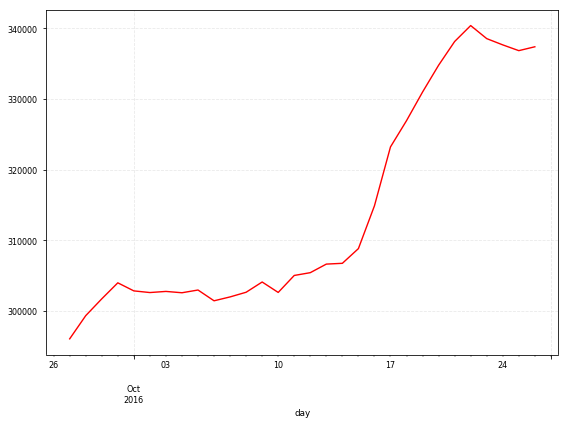

In [422]:
# without weights
daily_score.sum(axis=1).plot(color='red', figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

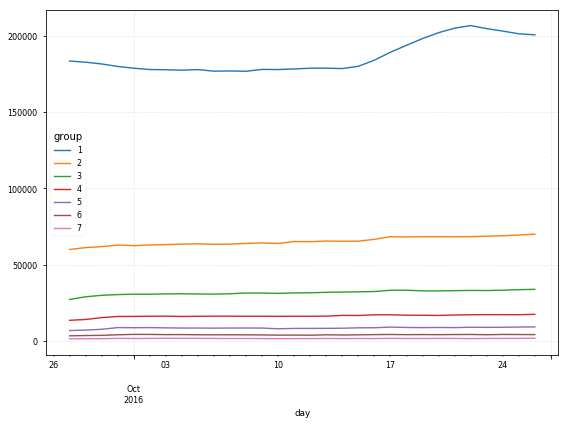

In [423]:
# without weights
daily_score.plot(figsize=(8,6));

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

In [424]:
coef_df.mean()

FQ_2         1.066428
FQ_3         1.755756
FQ_4         2.398918
FQ_5         3.068911
FQ_6         3.715177
FQ_7         4.386283
intercept   -0.245137
dtype: float64

In [425]:
# odd ratio
np.exp(coef_df.mean())

FQ_2          2.904983
FQ_3          5.787819
FQ_4         11.011261
FQ_5         21.518462
FQ_6         41.065852
FQ_7         80.341245
intercept     0.782598
dtype: float64

In [426]:
weight = [x for x in coef_df.mean()][:-1]
weight.insert(0, 1.0)

weight

[1.0,
 1.0664276936306787,
 1.7557555502505242,
 2.3989184875963305,
 3.068911254804999,
 3.7151769282509077,
 4.3862831213229985]

In [428]:
daily_score1 = daily_score.copy()

In [429]:
for i in range(1, 7):
    daily_score1.iloc[:, i] = (daily_score1.iloc[:, i] * weight[i-0]).apply(lambda x: round(x, 2))

In [430]:
daily_score1.head()

group,1,2,3,4,5,6,7
day,,,,,,,
2016-09-27,183357,63972.86,47897.01,32642.08,21243.00,12817.36,6469.77
2016-09-28,182610,65284.57,50957.29,33944.70,22083.89,13556.68,6632.06
2016-09-29,181451,65968.15,52634.04,36890.57,23774.86,13924.48,6912.78
2016-09-30,179801,67047.38,53475.05,38665.77,27126.11,15377.12,7798.81
2016-10-01,178675,66642.13,53885.89,38761.72,26880.59,16305.91,7452.30


In [431]:
daily_score1['kui'] = daily_score1.sum(axis=1)

In [453]:
daily_score1.ix['2016-10-10':,]

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-10-10,177793,68158.59,54811.18,38845.69,24732.36,14522.63,6833.83,385697.28
2016-10-11,178206,69498.03,55432.71,39037.60,25462.76,14593.21,7022.44,389252.75
2016-10-12,178669,69443.64,55515.23,38972.83,25490.38,14355.44,7097.01,389543.53
2016-10-13,178697,69875.54,56080.59,39188.73,25582.44,15269.38,7496.16,392189.84
2016-10-14,178428,69692.12,56379.07,40357.01,25880.13,14797.55,7167.19,392701.07
2016-10-15,179936,69790.23,56642.43,40220.27,26653.49,15165.35,7325.09,395732.86
2016-10-16,183947,71064.61,56995.34,41330.97,26791.60,15767.21,7215.44,403112.17
2016-10-17,189154,72853.01,58412.23,41328.57,28141.92,16075.57,7759.33,413724.63
2016-10-18,193667,72711.17,58496.51,40671.26,27371.62,15644.61,7434.75,415996.92


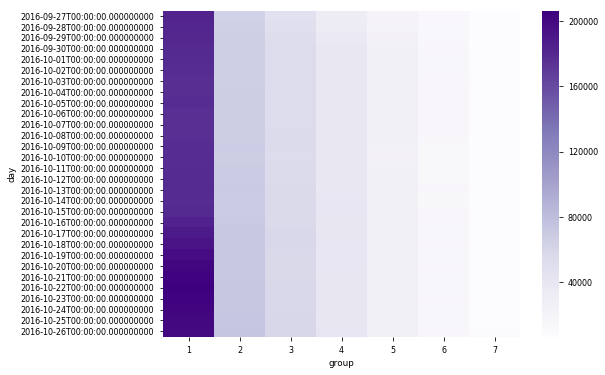

In [459]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(daily_score1.drop("kui", axis=1), annot=False, cmap='Purples');

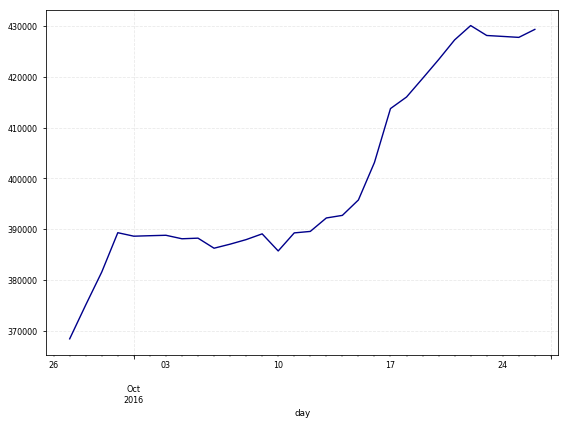

In [433]:
daily_score1['kui'].plot(figsize=(8,6), color='darkblue')

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

- Reference
    - http://blog.yhat.com/posts/logistic-regression-and-python.html
    - http://www.appstate.edu/~whiteheadjc/service/logit/intro.htm
    - http://www.cbgstat.com/method_logistic_regression_analysis/logistic_regression_analysis.php

In [434]:
# get odds ratio
dates = pd.to_datetime('2016-09-27')

score = []
beta = pd.DataFrame()

for i in range(0, sf1['day'].nunique()):
    subset = sf1[sf1['day'] == dates]
    subset['intercept'] = 1.0

    X = subset.drop(['isnextvisit', 'day'], axis=1)
    y = subset.isnextvisit

    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    logreg = LogisticRegression().fit(X_train, y_train)
  
    score.append(logreg.score(X_test, y_test))
    beta = beta.append(pd.DataFrame(np.exp(logreg.coef_)))

    dates = dates + timedelta(days=1)

In [436]:
beta.mean()

0     2.907396
1     5.795637
2    11.025249
3    21.585657
4    41.384911
5    81.721951
6     0.782948
dtype: float64

In [437]:
weight = [x for x in beta.mean()][:-1]
weight.insert(0, 1.0)

weight

[1.0,
 2.90739597755359,
 5.795636918607717,
 11.02524919955358,
 21.585656509836767,
 41.3849108203996,
 81.7219514038302]

In [442]:
daily_score_odd = daily_score.copy()

In [443]:
for i in range(1, 7):
    daily_score_odd.iloc[:, i] = (daily_score_odd.iloc[:, i] * weight[i-0]).apply(lambda x: round(x, 2))

In [445]:
daily_score_odd['kui'] = (daily_score_odd.sum(axis=1))

In [454]:
daily_score_odd.head(20)

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-09-27,183357,174408.87,158104.98,150020.57,149415.91,142777.94,120539.88,1078625.15
2016-09-28,182610,177984.97,168206.77,156007.28,155330.38,151013.54,123563.59,1114716.53
2016-09-29,181451,179848.61,173741.60,169546.28,167224.08,155110.65,128793.80,1155716.02
2016-09-30,179801,182790.89,176517.71,177704.97,190795.62,171292.15,145301.63,1224203.97
2016-10-01,178675,181686.08,177873.89,178145.98,189068.77,181638.37,138845.60,1225933.69
2016-10-02,177819,182974.06,177891.28,179480.03,190385.49,180189.90,141215.53,1229955.29
2016-10-03,177655,183729.98,179079.39,179744.64,187018.13,175430.64,149796.34,1232454.12
2016-10-04,177396,184593.48,179577.81,177925.47,184363.09,176299.72,146037.13,1226192.70
2016-10-05,177757,185131.35,178737.44,178994.92,184514.19,171623.23,145710.24,1222468.37


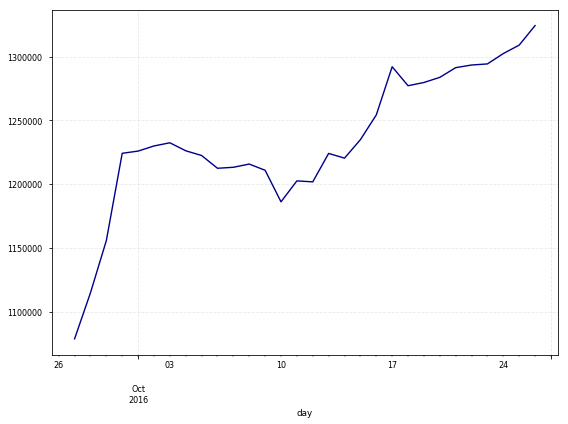

In [461]:
daily_score_odd['kui'].plot(c='darkblue', figsize=(8,6))

plt.grid(color='lightgrey', alpha=0.5, linestyle='--')
plt.tight_layout()

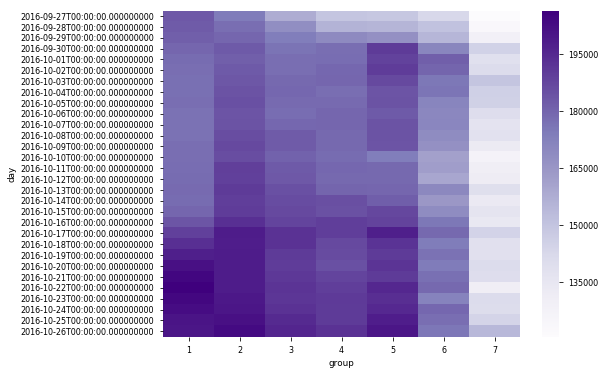

In [460]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(daily_score_odd.drop("kui", axis=1), annot=False, cmap='Purples');

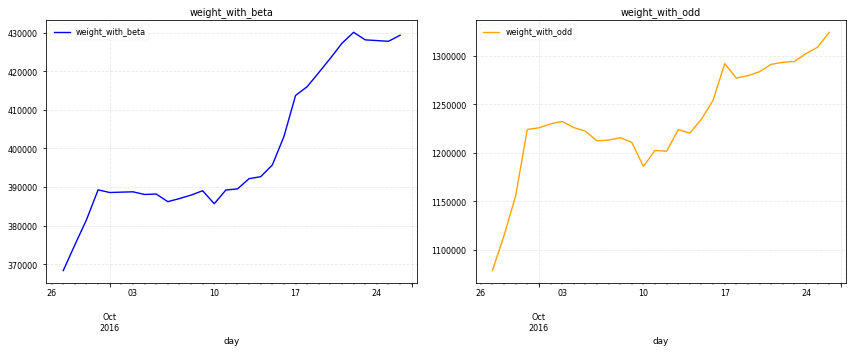

In [472]:
fig, ax = plt.subplots(1, 2)

daily_score1['kui'].plot(label='weight_with_beta', color='blue', ax=ax[0], figsize=(12,5));
ax[0].set_title("weight_with_beta")
ax[0].legend()
ax[0].grid(color='lightgrey', alpha=0.5, linestyle='--')

daily_score_odd['kui'].plot(label='weight_with_odd',  ax=ax[1], color='orange');
ax[1].set_title("weight_with_odd")
ax[1].legend()
ax[1].grid(color='lightgrey', alpha=0.5, linestyle='--')

plt.tight_layout()

In [473]:
daily_score_odd.head()

group,1,2,3,4,5,6,7,kui
day,,,,,,,,
2016-09-27,183357,174408.87,158104.98,150020.57,149415.91,142777.94,120539.88,1078625.15
2016-09-28,182610,177984.97,168206.77,156007.28,155330.38,151013.54,123563.59,1114716.53
2016-09-29,181451,179848.61,173741.60,169546.28,167224.08,155110.65,128793.80,1155716.02
2016-09-30,179801,182790.89,176517.71,177704.97,190795.62,171292.15,145301.63,1224203.97
2016-10-01,178675,181686.08,177873.89,178145.98,189068.77,181638.37,138845.60,1225933.69


In [479]:
daily_score_odd['kui_short_ver'] = (daily_score_odd['kui'] / 10000).round(2)

In [480]:
daily_score_odd.head()

group,1,2,3,4,5,6,7,kui,kui_short,kui_short_ver
day,,,,,,,,,,
2016-09-27,183357,174408.87,158104.98,150020.57,149415.91,142777.94,120539.88,1078625.15,107.86,107.86
2016-09-28,182610,177984.97,168206.77,156007.28,155330.38,151013.54,123563.59,1114716.53,111.47,111.47
2016-09-29,181451,179848.61,173741.60,169546.28,167224.08,155110.65,128793.80,1155716.02,115.57,115.57
2016-09-30,179801,182790.89,176517.71,177704.97,190795.62,171292.15,145301.63,1224203.97,122.42,122.42
2016-10-01,178675,181686.08,177873.89,178145.98,189068.77,181638.37,138845.60,1225933.69,122.59,122.59


In [482]:
daily_score_odd.kui_short_ver.describe()

count     30.000000
mean     123.450000
std        5.584643
min      107.860000
25%      121.267500
50%      122.605000
75%      128.280000
max      132.440000
Name: kui_short_ver, dtype: float64

### 3. Dashboard 생성
 - Redash: https://redash.io/
 - plotly: https://plot.ly/feed/#/
     - line chart example: https://plot.ly/python/line-charts/
 - creat a dashboard: https://plot.ly/create/

In [483]:
daily_score_odd.to_csv('daily_score.csv')